In [1]:
import pandas as pd
import seaborn as sns
from textblob import TextBlob 
import matplotlib as plt
import docx2txt
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text
 

In [2]:
# Read data of Kaggle: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews
data=pd.read_csv('Womens _Clothing.csv')

In [3]:
#Visualice data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
data.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [5]:
# Clean data to analise properly
data.drop(['Clothing ID','Age','Recommended IND','Positive Feedback Count','Class Name'], axis=1, inplace=True)
# data1=data[['Title','Review Text','Rating','Division Name','Department Name']]

In [6]:
# Normalize data frame
data.columns=data.columns.str.lower()
# data1.columns= [col.lower().replace(' ','_') for col in data1.columns]

In [7]:
data.head()

,unnamed: 0,title,review text,rating,division name,department name
0,0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [8]:
#Remove index
data.drop(data.columns[0],axis=1,inplace=True)


In [9]:
data.head()

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [ ]:
#  data1['division_name'].value_counts().plot(kind='bar')

In [10]:
#Remove NaNs in column Rewiew Text
data.dropna(subset=['review text'], inplace=True)
# df=data.dropna(subset=['review text'], how='any')

In [11]:
data.shape

(22641, 5)

In [12]:
data.head()

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [13]:
# Summarise the average rating number by division and department and plot
mean=data.groupby(['division name','department name'])['rating'].mean()

<AxesSubplot:ylabel='division name,department name'>

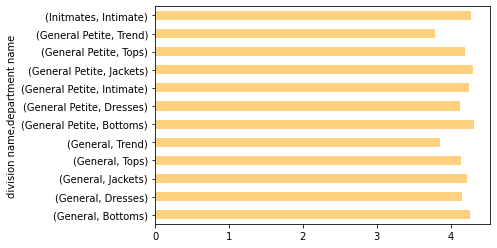

In [14]:
my_colors = 'rgymc'
mean.plot.barh (y='rating', rot=0, color='orange', alpha=0.5)

In [15]:
# Sample check on the review column to evaluate the accuracy of the sentiment polarity and subjectivity
data["review text"][5]

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [16]:
TextBlob(data["review text"][5]).sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [17]:
data["review text"][10]

'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'

In [18]:
TextBlob(data["review text"][10]).sentiment

Sentiment(polarity=-0.0971494708994709, subjectivity=0.6034920634920635)

In [19]:
data["review text"][123]

'After reading the previous reviews, i ordered a size larger. i am so glad i did it! it fits perfectly! i am 5\'4"/115/32dd and went with the s regular. so beautiful! i can\'t wait to wear it!'

In [20]:
TextBlob(data["review text"][123]).sentiment

Sentiment(polarity=0.40972222222222227, subjectivity=0.6239316239316239)

In [21]:
data["review text"][8]

'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'

In [22]:
TextBlob(data["review text"][8]).sentiment

Sentiment(polarity=0.0025000000000000022, subjectivity=0.38)

In [23]:
# Selected customer review to break out the text of the review into sentences.
text10=TextBlob(data["review text"][10])

In [24]:
text10.sentences

[Sentence("Dress runs small esp where the zipper area runs."),
 Sentence("i ordered the sp which typically fits me and it was very tight!"),
 Sentence("the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric."),
 Sentence("pretty disappointed as it was going to be my christmas dress this year!"),
 Sentence("needless to say it will be going back.")]

In [25]:
text5=TextBlob(data["review text"][5])
text5.sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19675 non-null  object
 1   review text      22641 non-null  object
 2   rating           22641 non-null  int64 
 3   division name    22628 non-null  object
 4   department name  22628 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
#data.dropna(subset=['title','division name','department name'], inplace=True)

In [28]:
#data.info()

In [30]:
# Calculate sentiment polarity for each row of review data set, as a new column on the data frame
def sentiment (text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [35]:
data['polarity']=data['review text'].apply(sentiment).apply(lambda x: x[0])

In [36]:
data['polarity']

0        0.633333
1        0.339583
2        0.073675
3        0.550000
4        0.512891
           ...   
23481    0.552667
23482    0.091667
23483    0.414286
23484    0.322222
23485    0.413889
Name: polarity, Length: 22641, dtype: float64

In [37]:
data.head()

,title,review text,rating,division name,department name,polarity
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891


In [38]:
# Summarise the minimum polarity number by division and department and plot
min_data_pol=data.groupby(['division name','department name'])['polarity'].min()

In [40]:
min_data_pol.head

<bound method NDFrame.head of division name   department name
General         Bottoms           -0.533333
                Dresses           -0.916667
                Jackets           -0.750000
                Tops              -0.975000
                Trend             -0.270833
General Petite  Bottoms           -0.257778
                Dresses           -0.400000
                Intimate          -0.575000
                Jackets           -0.562500
                Tops              -0.700000
                Trend             -0.083333
Initmates       Intimate          -0.392333
Name: polarity, dtype: float64>

Text(0.5, 1.0, 'Minimum')

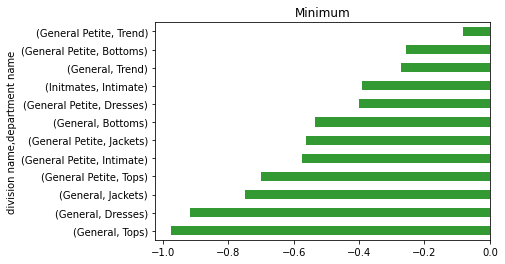

In [67]:
min_data_pol.sort_values().plot.barh(color='green', alpha=0.8).set_title('Minimum')

In [62]:
# Summarise average polarity number by division and department and plot
mean_data_pol=data.groupby(['division name','department name'])['polarity'].mean()

Text(0.5, 1.0, 'Average')

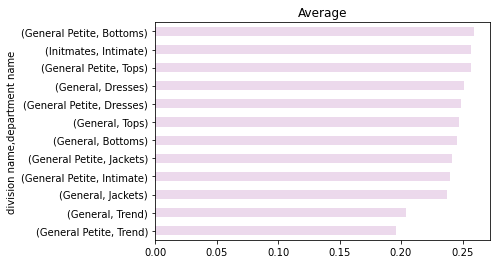

In [65]:
mean_data_pol.sort_values().plot.barh(color='purple', alpha=.15).set_title('Average')